In [15]:
import numpy as np
import matplotlib.pyplot as plt

## utils

In [16]:
"""获取数据"""

with open("assets/day_wise.csv", "r", encoding="utf-8") as f:
    data = f.readlines()

covid = {
    "date": [],
    "data": [],
    "header": [h for h in data[0].strip().split(",")[1:]]
}
for row in data[1:]:
    split_row = row.strip().split(",")
    covid["date"].append(split_row[0])
    covid["data"].append([float(n) for n in split_row[1:]])
data = np.array(covid["data"])

In [17]:
def get_data_by_date(date):
    """
    打印一行数据
    number[] -> dict
    """
    data_obj = {}
    date_idx = covid["date"].index(date)
    for header, number in zip(covid["header"], covid["data"][date_idx]):
        data_obj[header] = number
    return data_obj

In [18]:
def draw_line(x):
    plt.plot(x)
    plt.show()

## main

### data

![](assets/2022-11-27-11-36-48.png)

### task

- 获取 2020 年 2 月 3 日的所有数据
- 2020 年 1 月 24 日之前的累积确诊病例有多少个？
- 2020 年 7 月 23 日的新增死亡数是多少？
- 从 1 月 25 日到 7 月 22 日，一共增长了多少确诊病例？
- 每天新增确诊数和新恢复数的比例？平均比例，标准差各是多少？
- 画图展示新增确诊的变化曲线
- 画图展示死亡率的变化曲线

### 某日所有数据

In [19]:
"""获取 2020 年 2 月 3 日的所有数据"""
print(get_data_by_date("2020-02-03"))

{'Confirmed': 19887.0, 'Deaths': 426.0, 'Recovered': 604.0, 'Active': 18857.0, 'New cases': 3100.0, 'New deaths': 64.0, 'New recovered': 145.0, 'Deaths / 100 Cases': 2.14, 'Recovered / 100 Cases': 3.04, 'Deaths / 100 Recovered': 70.53, 'No. of countries': 25.0}


### 累积确诊

In [20]:
"""2020 年 1 月 24 日之前的累积确诊病例有多少个？"""
print(get_data_by_date("2020-01-24")["Confirmed"])

941.0


### 新增死亡

In [21]:
"""2020 年 7 月 23 日的新增死亡数是多少？"""
print(get_data_by_date("2020-07-23")["New deaths"])

9966.0


### 总增长数

In [22]:
"""从 1 月 25 日到 7 月 22 日，一共增长了多少确诊病例？"""
start_date = "2020-01-25"
end_date = "2020-07-22"
start_confirmed = get_data_by_date(start_date)["Confirmed"]
end_confirmed = get_data_by_date(end_date)["Confirmed"]
print(end_confirmed - start_confirmed)

15226291.0


In [23]:
"""从 1 月 25 日到 7 月 22 日，一共增长了多少确诊病例？"""
start_idx = covid["date"].index("2020-01-25")
end_idx = covid["date"].index("2020-07-22")
new_cases_idx = covid["header"].index("New cases")

# 注意要 start_idx+1 得到从 01-25 这一天的新增
# end_idx+1 来包含 7 月 22 的结果
new_cases = data[start_idx+1: end_idx+1, new_cases_idx]
overall = new_cases.sum()
print("共新增：", overall)

共新增： 15247309.0


In [24]:
"""
为什么两种计算结果对应不上呢？

可能是因为有人感染了两次或多次，导致新增的数据中重复计算了
"""
confirm_idx = covid["header"].index("Confirmed")
confirmed = data[:, confirm_idx]
new_cases = data[:, new_cases_idx]

for i in range(start_idx, end_idx+1):
    diff = new_cases[i] - (confirmed[i] - confirmed[i-1]) 
    if diff != 0:
        print("date index:", i, ";差异：", diff)

date index: 62 ;差异： 15.0
date index: 81 ;差异： 21.0
date index: 87 ;差异： 1.0
date index: 91 ;差异： 2188.0
date index: 93 ;差异： 10034.0
date index: 95 ;差异： 1.0
date index: 97 ;差异： 105.0
date index: 98 ;差异： 2512.0
date index: 101 ;差异： 167.0
date index: 103 ;差异： 1.0
date index: 106 ;差异： 1583.0
date index: 107 ;差异： 1480.0
date index: 109 ;差异： 9.0
date index: 110 ;差异： 57.0
date index: 111 ;差异： 20.0
date index: 112 ;差异： 165.0
date index: 113 ;差异： 1.0
date index: 118 ;差异： 209.0
date index: 120 ;差异： 104.0
date index: 124 ;差异： 372.0
date index: 125 ;差异： 220.0
date index: 132 ;差异： 766.0
date index: 133 ;差异： 1.0
date index: 149 ;差异： 148.0
date index: 158 ;差异： 719.0
date index: 163 ;差异： 1.0
date index: 175 ;差异： 5.0
date index: 176 ;差异： 3.0
date index: 181 ;差异： 110.0


### 确诊恢复比例确诊恢复比例

In [25]:
"""每天新增确诊数和新恢复数的比例？平均比例，标准差各是多少？"""
new_cases_idx = covid["header"].index("New cases")
new_recovered_idx = covid["header"].index("New recovered")

not_zero_mask = data[:, new_recovered_idx] != 0 # 排除 0
ratio = data[not_zero_mask, new_cases_idx] / data[not_zero_mask, new_recovered_idx] #利用了切片

# 平均比例, 标准差
ratio_mean = ratio.mean()
ratio_std = ratio.std()
print("比例", ratio)
print("平均比例：", ratio_mean, "；标准差：", ratio_std)

比例 [ 49.5         47.83333333 164.33333333  52.61538462  89.88888889
  57.63043478  32.66666667 129.25        21.70512821  34.0483871
  26.67977528  21.37931034  18.48387097  14.98         9.1037464
   7.28247423   4.82186949   5.15672913   3.8630137    2.90469417
   4.36574074  12.62257169   3.85264409   1.60977502   1.49188426
   1.18627451   1.02985075   0.24750147   0.27696203   1.05360134
   0.45351532   0.70989011   0.32358003   0.32744722   0.3971134
   0.4799437    0.40655447   0.6299867    0.82377332   0.68613139
   0.99268105   0.78250511   1.06608098   1.93949828   1.62168675
   1.69554031   2.16787104   2.62899006   3.31588057   4.35276306
   7.48311688   4.68607595   3.2686217    7.14028251   5.75508721
   7.88803866  17.05436775  12.10961145   7.57290202   5.37570394
  90.48283262   4.31338434   9.32764317   7.53200144   7.39889706
   8.15931018   6.29711447   4.1848375    6.17902482   4.96184896
   4.89824287   5.54071162   4.02073756   5.35009325   4.44885216
   3.36380

### 可视化数据

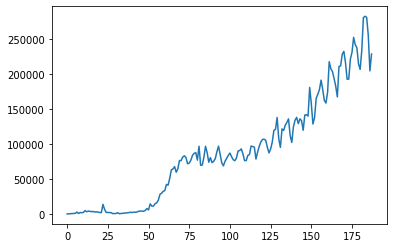

In [26]:
"""画图展示新增确诊的变化曲线"""
new_cases_idx = covid["header"].index("New cases")
draw_line(data[:, new_cases_idx])

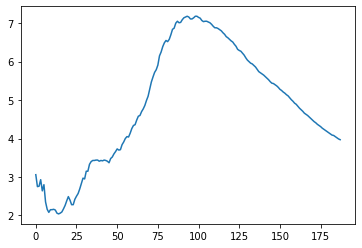

In [27]:
"""画图展示死亡率的变化曲线"""
death_ratio_idx = covid["header"].index("Deaths / 100 Cases")
draw_line(data[:, death_ratio_idx])